### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

$$\large H_0: \mu_{coff} == \mu_{noncoff}\\
  \large H_1: \mu_{coff} != \mu_{noncoff}
$$

**Null**: The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers.

**Alternative** : The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers.

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

$$\large H_0: \mu_{coff} - \mu_{noncoff} \geq 0\\
  \large H_1: \mu_{coff} - \mu_{noncoff} < 0
$$

**Null**: The average height for all coffee drinkers is the same  or greater than the average height for all non-coffee drinkers.

**Alternative**: The average height for all coffee drinkers is less than the average height for all non-coffee drinkers.

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [5]:
boot_means_coff_height = []
boot_means_non_coff_height = []
diffs = []

for n in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    boot_means_coff_height.append(bootsample.query('drinks_coffee == True').height.mean())
    boot_means_non_coff_height.append(bootsample.query('drinks_coffee == False').height.mean())
    diffs.append(bootsample.query('drinks_coffee == True').height.mean() - bootsample.query('drinks_coffee == False').height.mean())

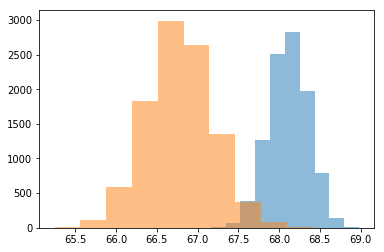

In [28]:
plt.hist(boot_means_coff_height, alpha = 0.5);
plt.hist(boot_means_non_coff_height, alpha = 0.5);

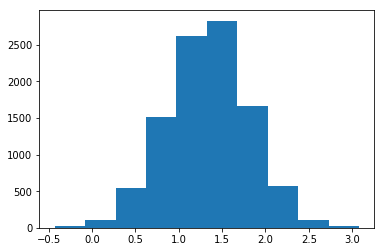

In [10]:
plt.hist(diffs);

In [13]:
# 1. The standard deviation of the sampling distribution for the mean of those that do not drink coffee.
print('std of coff drinkers: ',np.std(boot_means_non_coff_height))
# 2. The standard deviation of the sampling distribution for the mean of those that drink coffee.
print('std of Non coff drinkers: ',np.std(boot_means_coff_height))
# 3. The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those that do not.
print('std of difference in means : ',np.std(diffs))
# 4. What is the shape of each sampling distribution?
print('Normal')
# 5. What is the reason for the shape of each of these distributions?
print('Central Limit Theorem')

std of coff drinkers:  0.405126312775
std of Non coff drinkers:  0.240737633735
std of difference in means :  0.469809107439
Normal
Central Limit Theorem


**Notice** the **standard deviation** with the **difference in means** is **larger than either of the individual** at **0.4698**. It turns out that this value for the standard deviation of the difference is actually the square root of the sum of the variance of each of the individual sampling distributions. And the mean has a standard deviation of the original draws divided by the square root of the sample size taken. More on this [here](http://www.statsmodels.org/stable/glm.html) and [here](http://onlinestatbook.com/2/sampling_distributions/samp_dist_mean.html).

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

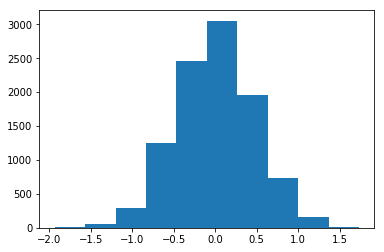

In [25]:
null_vals = np.random.normal(0.0, np.std(diffs), 10000)
plt.hist(null_vals);

In [27]:
# Calculate the observe sample mean difference in sample_data

mean_ht_coff_drinkers = sample_data.query('drinks_coffee == True').height.mean()
mean_ht_non_coff_drinkers = sample_data.query('drinks_coffee == False').height.mean()
mean_ht_coff_drinkers - mean_ht_non_coff_drinkers

1.3347071093073879

* We can expect the standard deviation of the sampling distribution for differences from the null to be essentially the same as what we observed from the data.

* If the null hypothesis is true, we would expect the difference in means of coffee drinkers and non-drinkers to be zero.